In [48]:
!pip install lxml

Defaulting to user installation because normal site-packages is not writeable


# Explore here

It's recommended to use this notebook for exploration purposes.

In [54]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import io

# Get the HTML
url = "https://en.wikipedia.org/wiki/List_of_most-streamed_songs_on_Spotify"

# Add User-Agent header to avoid 403 error
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    

# Check the response 
 print("Status:", response.status_code)

# Extract tables with pandas
html = io.StringIO(response.text)  # Convert the HTML to a text file

# read_html() returns a list of DataFrames
tables = pd.read_html(html)
print(f"{len(tables)} tables were found.")

# Inspect the first rows of the correct table
df = tables[0]  # Extract the first table from the tables found
print(f"\nDataFrame shape: {df.shape}")
print(f"Columns: {list(df.columns)}\n")

# Display the first 10 rows
df.head(10)






Status: 200
26 tables were found.

DataFrame shape: (101, 6)
Columns: ['Rank', 'Song', 'Artist(s)', 'Streams (billions)', 'Release date', 'Ref.']



,Rank,Song,Artist(s),Streams (billions),Release date,Ref.
0,1,"""Blinding Lights""",The Weeknd,5.258,29 November 2019,[1]
1,2,"""Shape of You""",Ed Sheeran,4.750,6 January 2017,[2]
2,3,"""Sweater Weather""",The Neighbourhood,4.351,3 December 2012,[3]
3,4,"""Starboy""",The Weeknd and Daft Punk,4.340,21 September 2016,[4]
4,5,"""As It Was""",Harry Styles,4.226,1 April 2022,[5]
5,6,"""Someone You Loved""",Lewis Capaldi,4.210,8 November 2018,[6]
6,7,"""Sunflower""",Post Malone and Swae Lee,4.105,18 October 2018,[7]
7,8,"""One Dance""",Drake with Wizkid and Kyla,4.010,5 April 2016,[8]
8,9,"""Perfect""",Ed Sheeran,3.811,3 March 2017,[9]
9,10,"""Stay""",The Kid Laroi and Justin Bieber,3.786,9 July 2021,[10]


In [ ]:
# Step 4: Process the DataFrame - Data cleaning

df = df.copy()  # Create a copy of the DataFrame

# Method to Remove $ and B and strip whitespace
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(r"[\$B,]", "", regex=True).str.strip()

In [ ]:
#Create an empty database instance and include the cleaned data in it, as we saw in the database module. Once you have an empty database:

#Create the table.
#Insert the values.
#Commit the changes.


In [ ]:
# Step 6: Create database and store data

# Create an empty database instance
conn = sqlite3.connect("spotify_songs.db")
print("Database created successfully!")

# Create a cursor object
cursor = conn.cursor()

# Create the 'songs' table
cursor.execute("""
CREATE TABLE IF NOT EXISTS songs (
    Rank INTEGER,
    Song TEXT,
    Artist TEXT,
    Streams_billions REAL,
    Date_released TEXT,
    Reference TEXT
)
""")
print("Table 'songs' created successfully!")

# Insert the DataFrame values into the table
df.to_sql('songs', conn, if_exists='replace', index=False)
print(f"Inserted {len(df)} rows into the 'songs' table")

# Commit the changes
conn.commit()
print("Changes committed successfully!")

# Select and display the values
cursor.execute("SELECT COUNT(*) FROM songs")
total_rows = cursor.fetchone()[0]
print(f"\nTotal rows in database: {total_rows}")

# Display first 10 rows from the database
print("\nFirst 10 rows from the database:")
result = pd.read_sql_query("SELECT * FROM songs LIMIT 10", conn)
display(result)

# Close the connection
conn.close()
print("\nDatabase connection closed.")




Database created successfully!
Table 'songs' created successfully!
Inserted 101 rows into the 'songs' table
Changes committed successfully!

Total rows in database: 101

First 10 rows from the database:


,Rank,Song,Artist(s),Streams (billions),Release date,Ref.
0,1,"""Blinding Lights""",The Weeknd,5.258,29 November 2019,[1]
1,2,"""Shape of You""",Ed Sheeran,4.750,6 January 2017,[2]
2,3,"""Sweater Weather""",The Neighbourhood,4.351,3 December 2012,[3]
3,4,"""Starboy""",The Weeknd and Daft Punk,4.340,21 September 2016,[4]
4,5,"""As It Was""",Harry Styles,4.226,1 April 2022,[5]
5,6,"""Someone You Loved""",Lewis Capaldi,4.210,8 November 2018,[6]
6,7,"""Sunflower""",Post Malone and Swae Lee,4.105,18 October 2018,[7]
7,8,"""One Dance""",Drake with Wizkid and Kyla,4.010,5 April 2016,[8]
8,9,"""Perfect""",Ed Sheeran,3.811,3 March 2017,[9]
9,10,"""Stay""",The Kid Laroi and Justin Bieber,3.786,9 July 2021,[10]



Database connection closed.


Current columns (7): ['Rank', 'Song', 'Artist', 'Streams (billions)', 'Date released', 'Reference', 'Year']



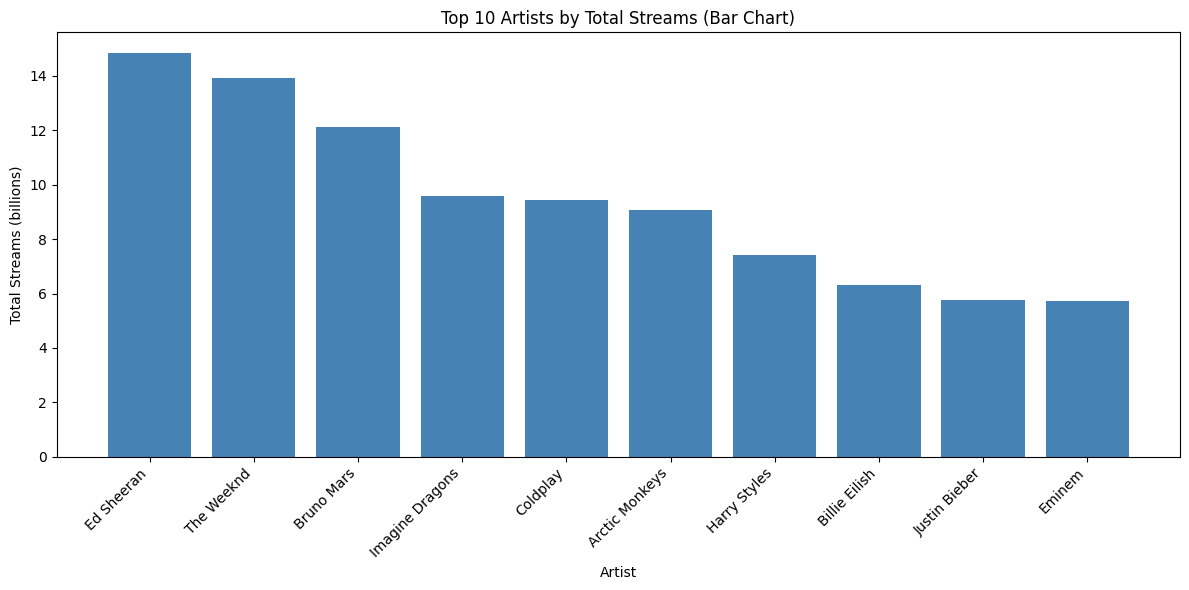

/tmp/ipykernel_9026/260965260.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Year", order=sorted(df["Year"].dropna().unique()), palette="viridis")


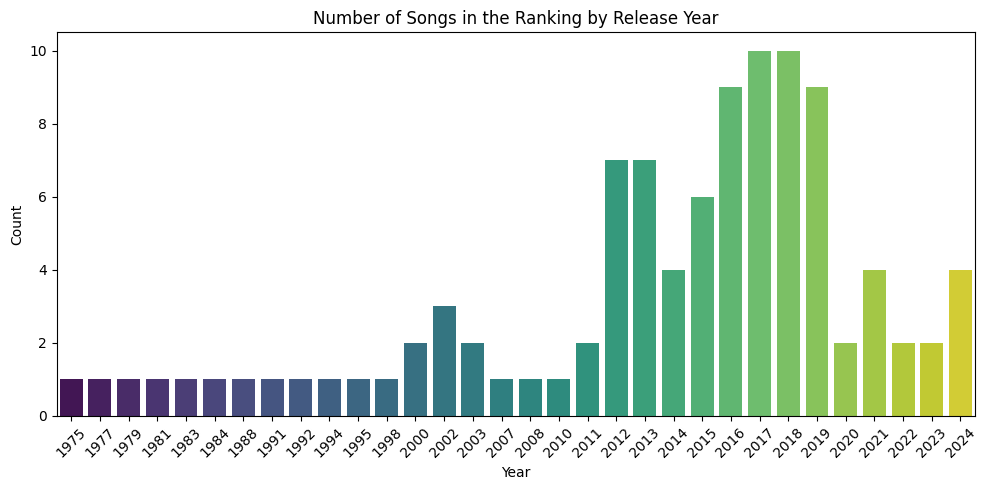

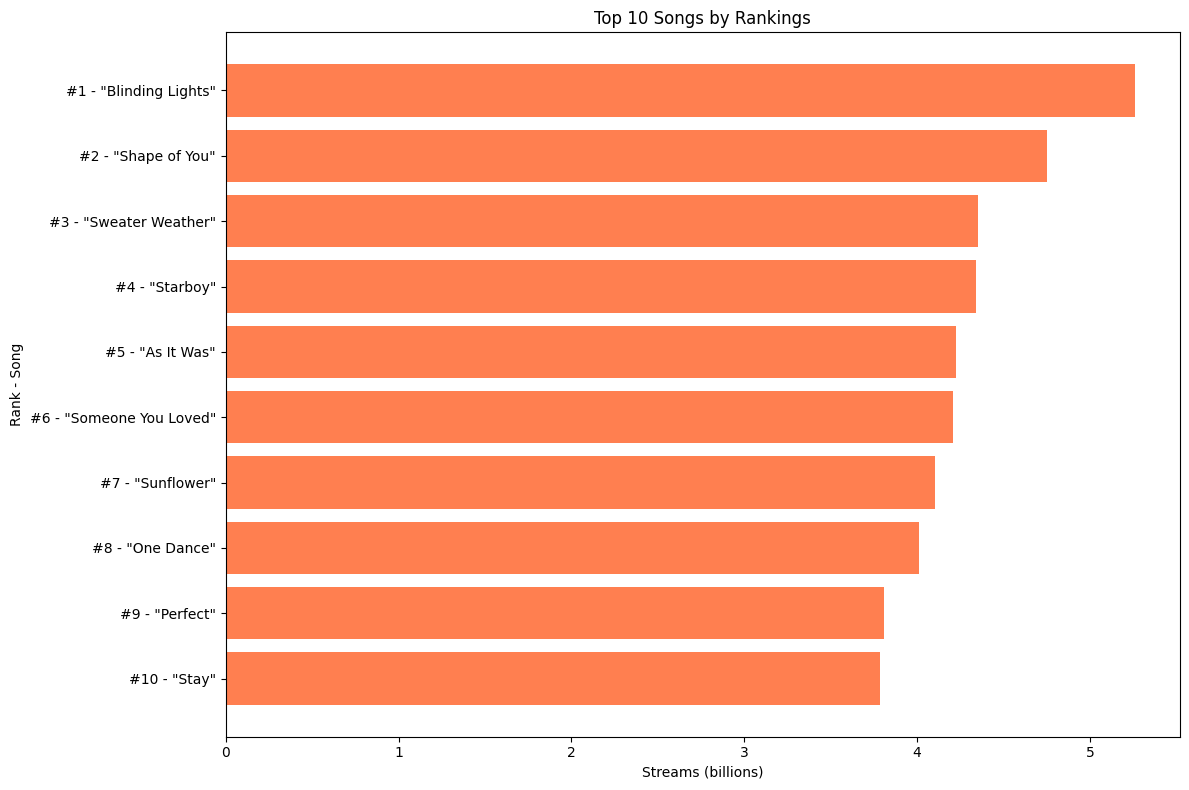

In [68]:
# Step 7: Visualize the data - 3 plots

# Check current columns first
print(f"Current columns ({len(df.columns)}): {list(df.columns)}\n")

# Clean the data without renaming (use existing column names)
df = df.copy()

# Get the column names
cols = df.columns.tolist()

# Remove brackets from text columns
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(r"\[.*?\]", "", regex=True).str.strip()

# Identify the columns
streams_col = [col for col in df.columns if 'billions' in str(col).lower() or df.columns.tolist().index(col) == 3][0]
date_col = [col for col in df.columns if 'date' in str(col).lower() or 'released' in str(col).lower()][0]
artist_col = [col for col in df.columns if 'artist' in str(col).lower()][0]
song_col = [col for col in df.columns if 'song' in str(col).lower() or 'name' in str(col).lower()][0]
rank_col = [col for col in df.columns if 'rank' in str(col).lower()][0]

# Convert data types
df[streams_col] = pd.to_numeric(df[streams_col], errors='coerce')
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
df[rank_col] = pd.to_numeric(df[rank_col], errors='coerce')
df['Year'] = df[date_col].dt.year

# Remove rows with missing streams
df = df.dropna(subset=[streams_col])

# Plot 1: Artist vs Total Streams - Bar Chart
artist_streams = df.groupby(artist_col)[streams_col].sum().nlargest(10)
plt.figure(figsize=(12, 6))
plt.bar(range(len(artist_streams)), artist_streams.values, color='steelblue')
plt.xticks(range(len(artist_streams)), artist_streams.index, rotation=45, ha='right')
plt.xlabel("Artist")
plt.ylabel("Total Streams (billions)")
plt.title("Top 10 Artists by Total Streams (Bar Chart)")
plt.tight_layout()
plt.show()

# Plot 2: Number of songs per year - Bar Chart
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Year", order=sorted(df["Year"].dropna().unique()), palette="viridis")
plt.title("Number of Songs in the Ranking by Release Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 3: Top 10 Songs by Rankings
top_songs = df.nsmallest(10, rank_col)  # Get top 10 ranked songs (lowest rank numbers)
plt.figure(figsize=(12, 8))
plt.barh(range(len(top_songs)), top_songs[streams_col].values, color='coral')
plt.yticks(range(len(top_songs)), 
           [f"#{int(row[rank_col])} - {row[song_col][:30]}" for _, row in top_songs.iterrows()])
plt.xlabel("Streams (billions)")
plt.ylabel("Rank - Song")
plt.title("Top 10 Songs by Rankings")
plt.gca().invert_yaxis()  # Invert to show #1 at top
plt.tight_layout()
plt.show()
